In [9]:
import datetime
import matplotlib.dates as mdates
import glob, json, os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

plt.style.use('seaborn')

df = pd.read_csv("../../Database_links_scores.csv")

In [11]:
df.head()

,Exam_name,Patient_name,RR_intervals_filepath,Feats_filepath,Annotations_filepath,Patient_infos_filepath,Quality_score,missing_beats
0,00000002_s001_t000,0,/Users/lauraperso/Documents/aura/res-v0_4/trai...,/Users/lauraperso/Documents/aura//feats-v0_4/t...,/Users/lauraperso/Documents/aura//annot-v0_4/t...,/Users/lauraperso/Documents/aura//info-patient...,0.215278,0.0
1,00000002_s001_t001,0,/Users/lauraperso/Documents/aura/res-v0_4/trai...,/Users/lauraperso/Documents/aura//feats-v0_4/t...,/Users/lauraperso/Documents/aura//annot-v0_4/t...,/Users/lauraperso/Documents/aura//info-patient...,0.986164,0.0
2,00000002_s002_t000,0,/Users/lauraperso/Documents/aura/res-v0_4/trai...,/Users/lauraperso/Documents/aura//feats-v0_4/t...,/Users/lauraperso/Documents/aura//annot-v0_4/t...,/Users/lauraperso/Documents/aura//info-patient...,0.134146,0.0
3,00000002_s004_t000,0,/Users/lauraperso/Documents/aura/res-v0_4/trai...,/Users/lauraperso/Documents/aura//feats-v0_4/t...,/Users/lauraperso/Documents/aura//annot-v0_4/t...,/Users/lauraperso/Documents/aura//info-patient...,0.997525,0.0
4,00000002_s004_t002,0,/Users/lauraperso/Documents/aura/res-v0_4/trai...,/Users/lauraperso/Documents/aura//feats-v0_4/t...,/Users/lauraperso/Documents/aura//annot-v0_4/t...,/Users/lauraperso/Documents/aura//info-patient...,0.998275,0.0


In [6]:
# Add important info to dataframe
exam_durations = []
for file in df["RR_intervals_filepath"]: 
    try:
        data = json.load(open(file, "r"))
        exam_durations.append(data["infos"]["exam_duration"])
    except Exception as e:
        exam_durations.append(0)
        
df["exam_duration"] = exam_durations

nb_seizures = []
seizure_duration = []
for file in df["Annotations_filepath"]: 
    try:
        data = json.load(open(file, "r"))
        nb_seizures.append(len(data["seizure"]))
        if len(data["seizure"]) != 0:
            for s in data["seizure"]:
                seizure_duration.append(s[1] - s[0])
        else:
            seizure_duration.append(0)
        
    except Exception as e:
        nb_seizures.append(0)
        seizure_duration.append(0)
        
df["nb_seizures"] = nb_seizures
df["seizures_duration"] = seizure_duration

ValueError: Length of values does not match length of index

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Exam_name               5610 non-null   object 
 1   Patient_name            5610 non-null   int64  
 2   RR_intervals_filepath   5610 non-null   object 
 3   Feats_filepath          5081 non-null   object 
 4   Annotations_filepath    5610 non-null   object 
 5   Patient_infos_filepath  5610 non-null   object 
 6   Quality_score           5610 non-null   float64
 7   missing_beats           5610 non-null   float64
 8   exam_duration           5610 non-null   int64  
 9   nb_seizures             5610 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 438.4+ KB


# Data exploration

First, explore data from df, its range and variability.
This database contains 132 patients and 5610 exams.

Text(0.5, 1.0, 'Distribution of exams per patients in database (132 patients)')

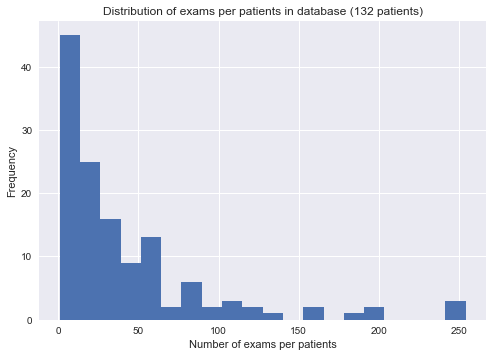

In [22]:
df.Patient_name.value_counts().sort_index(ascending=False).plot.hist(bins=20)
plt.xlabel('Number of exams per patients')
plt.title('Distribution of exams per patients in database ({} patients)'.format(df.Patient_name.unique().shape[0]))

Text(0.5, 1.0, 'Distribution of exam duration (5610 exams)')

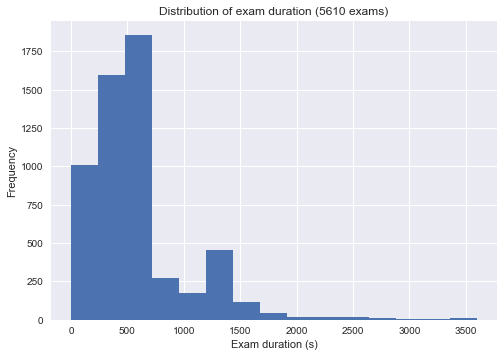

In [23]:
df.Exam_duration.plot.hist(bins=15)
plt.xlabel('Exam duration (s)')
plt.title('Distribution of exam duration ({} exams)'.format(df.shape[0]))

Text(0.5, 1.0, 'Number of seizures per exams')

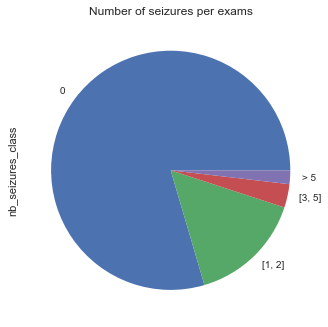

In [24]:
df.loc[df.Nb_Seizures == 0, 'nb_seizures_class'] = '0'
df.loc[df.Nb_Seizures.between(1, 2), 'nb_seizures_class'] = '[1, 2]'
df.loc[df.Nb_Seizures.between(3, 5), 'nb_seizures_class'] = '[3, 5]'
df.loc[df.Nb_Seizures > 5, 'nb_seizures_class'] = '> 5'

df.nb_seizures_class.value_counts().plot.pie()
plt.title('Number of seizures per exams')

Text(0.5, 1.0, "Distribution of seizure's duration")

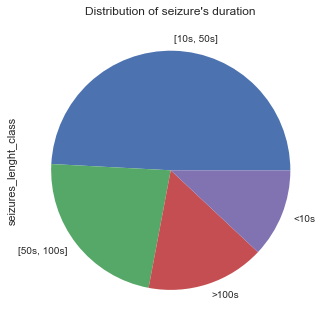

In [25]:
dd = pd.DataFrame(seizure_duration)
dd.columns = ['duration']
dd.loc[dd.duration < 10, 'seizures_lenght_class'] = '<10s'
dd.loc[dd.duration.between(10, 50), 'seizures_lenght_class'] = '[10s, 50s]'
dd.loc[dd.duration.between(50, 100), 'seizures_lenght_class'] = '[50s, 100s]'
dd.loc[dd.duration > 100, 'seizures_lenght_class'] = '>100s'
dd.seizures_lenght_class.value_counts().plot.pie()
plt.title('Distribution of seizure\'s duration')


In [26]:
df[df.Nb_Seizures == 0].Patient_name.unique().shape[0]

130

1. Most of the exams have no seizure reported (4463 / 5610)
2. The rest of the exams contains mostly 1 or 2 seizures
3. Max of seizures reported in one exam is 33
4. Most common seizure's lenght is between 10 and 50 seconds

From this database, we actually have 1147 exams usable to caracterize the seizures.
This corresponds to 130 patients (some patients have 0 seizures reported in their exams).

But those exams without seizures could be used for the basal state?

Now let's look at the quality of the exams containing reported seizures.

695

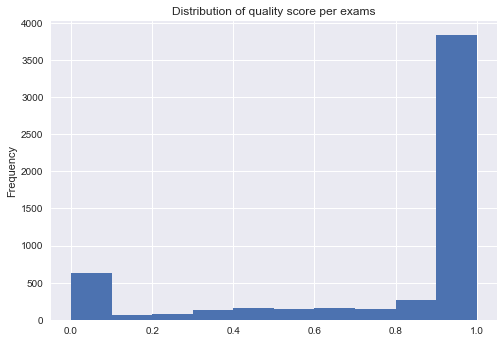

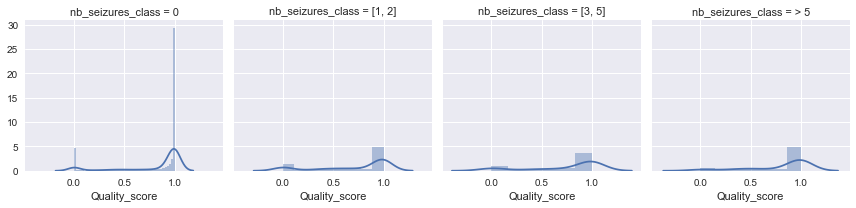

In [27]:
df.Quality_score.plot.hist()
plt.title('Distribution of quality score per exams')

g = sns.FacetGrid(df, col='nb_seizures_class', col_order=['0', '[1, 2]', '[3, 5]', '> 5'])
g.map(sns.distplot, 'Quality_score')

df[(df.Quality_score > 0.8) & (df.Nb_Seizures > 0)].shape[0]

58 exams from 31 patients


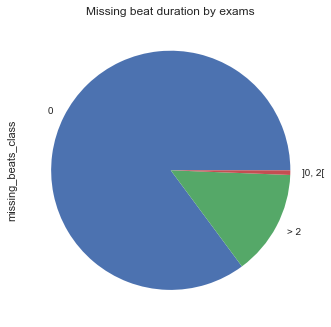

In [28]:
df.loc[df.missing_beats == 0, 'missing_beats_class'] = '0'
df.loc[df.missing_beats.between(0, 2, inclusive=False), 'missing_beats_class'] = ']0, 2['
df.loc[df.missing_beats > 2, 'missing_beats_class'] = '> 2'

df['missing_beats_class'].value_counts().plot.pie()
plt.title('Missing beat duration by exams')

# df_filtered = df[(df.Quality_score > 0.8) & (df.Nb_Seizures > 0)& (df.missing_beats < 2)]
df_filtered = df[(df.Quality_score > 0.8) & (df.Nb_Seizures == 3)& (df.missing_beats < 2) & (df.Exam_duration >= 50)]
print('{} exams from {} patients'.format(df_filtered.shape[0], df_filtered.Patient_name.unique().shape[0]))

Quality score (["corrcoefs"][1][2]) is the F1 score of metrics between swt and xqrs

Missing beat : if > 2 it means the signal contains peaks R-R > 2 seconds which is not clinically possible. Can probably be an issue with the signal.

##### If we only count exams with at least 1 seizure, and with a quality score > 0.8, missing_beats < 2 we have 643 exams left (from 93 patients) for our analysis


Should we filter on duration also?

In [29]:
df_filtered.iloc[:, [0, 1, 2, 3, 4, 5]].to_csv('./selected_exams_643.csv')

In [30]:
list_of_patient_seizure = df_filtered.Patient_name.unique().tolist()
df_no_seizure = df[(df.Patient_name.isin(list_of_patient_seizure)) & (df.Nb_Seizures ==0)]

# Cardiac Signal visualization

This section aims to visualize the cardiac data and their seizure labels.
We use mean_hr and t_feats[29] which are sampled every 10s from the original data.

mean_hr contains nan values and Inf so we need to clean it => Interpolate missing values
mean_hr contains a lot of bpm peaks, smoothing the signal with rolling median or rolling mean can help us visualize the trend of the signal.

WIP : 
1. display outlierP in red

In [31]:
# Brief: Function to play with window of rolling mean
def compute_obs_window_data(df_e, w):
    qrs_data = json.load(open(df_e["RR_intervals_filepath"].values[0], "r"))
    seizure_data = json.load(open(df_e['Annotations_filepath'].values[0], 'r'))
    data = json.load(open(df_e["Feats_filepath"].values[0], "r"))
    
    hr = qrs_data["swt"]["hr"]
    feats = np.array(data["features"])
    t_feats = np.transpose(feats)
    
    mean_hr = interpolate_invalid_values(t_feats[14])
    
    df = pd.DataFrame({'hr': mean_hr, 'label': t_feats[29]})
    df['stdP'] = df.hr.rolling(window=w).mean() + df.hr.rolling(window=w).std()
    df['stdN'] = df.hr.rolling(window=w).mean() - df.hr.rolling(window=w).std()
    df['mean'] = df.hr.rolling(window=w).mean()
    df['rlabel'] = df.label.rolling(window=w).max()
    
    fig, ax = plt.subplots(2,1, figsize = (20,10))
    df[['stdP', 'stdN']].plot(linestyle='--', alpha=0.5, ax=ax[0])
    df['mean'].plot(ax=ax[0])
    df['rlabel'].plot(ax=ax[1])

    

In [32]:
def interpolate_invalid_values(array):
    def nan_helper(y):
        return (np.isnan(y) | np.isinf(y)), lambda z: z.nonzero()[0]
    
    nans, x= nan_helper(array)
    array[nans]= np.interp(x(nans), x(~nans), array[~nans])
    return array
    
def print_exam_w_label(df_e):    
    qrs_data = json.load(open(df_e["RR_intervals_filepath"].values[0], "r"))
    seizure_data = json.load(open(df_e['Annotations_filepath'].values[0], 'r'))
#     hr = qrs_data["swt"]["hr"]
        
    data = json.load(open(df_e["Feats_filepath"].values[0], "r"))
    feats = np.array(data["features"])
    t_feats = np.transpose(feats)
    xticks = range(0, len(t_feats[29])*10-1, 10)
    mean_hr = interpolate_invalid_values(t_feats[14])
    
    df = pd.DataFrame({'hr': mean_hr, 'label': t_feats[29]})
    w = 10
    df['stdP'] = df.hr.rolling(window=w, center=True).mean() + df.hr.rolling(window=w, center=True).std()
    df['stdN'] = df.hr.rolling(window=w, center=True).mean() - df.hr.rolling(window=w, center=True).std()
    df['mean'] = df.hr.rolling(window=w, center=True).mean()
    df['median'] = df.hr.rolling(window=w, center=True).median()
    df.loc[(df['hr'] > df['stdP']) | (df['hr'] < df['stdN']), 'outlierP'] = 1
    
    
    fig, ax = plt.subplots(2,1, figsize = (20,10))
    df.index = xticks
    df['hr'].plot(ax=ax[0], xticks=xticks)
    df['mean'].plot(linestyle='--', alpha=0.5, ax=ax[0], xticks=xticks)
    df['median'].plot(linestyle='--', alpha=0.5, ax=ax[0], xticks=xticks)
    df['label'].plot(ax=ax[1], xticks=xticks)

    ax[0].set_xticks(ax[0].get_xticks()[::2])
    ax[0].set_ylabel('bpm')
    ax[1].set_xticks(ax[1].get_xticks()[::2])
    ax[1].set_ylabel('p. of seizure')
    
    for ax_l in ax:
        ax_l.set_xlabel('seconds')
    
    for line in seizure_data['seizure']:
        ax[0].axvline(x=line[0], linestyle='--', alpha=0.5, color='red', label='beg of seizure')
        ax[0].axvline(x=line[1], linestyle='--', alpha=0.5, color='red', label='end of seizure')
    
    fig.suptitle('Exam : {}'.format(df_e.Exam_name.values[0]), fontsize=26)
    fig.legend()

    

In [53]:
# Interesting exam to visualize
#'00011869_s005_t004'
#'00011077_s003_t002'
# '00000302_s002_t006'
df_e = df[df['Exam_name'] == '00005943_s001_t000']

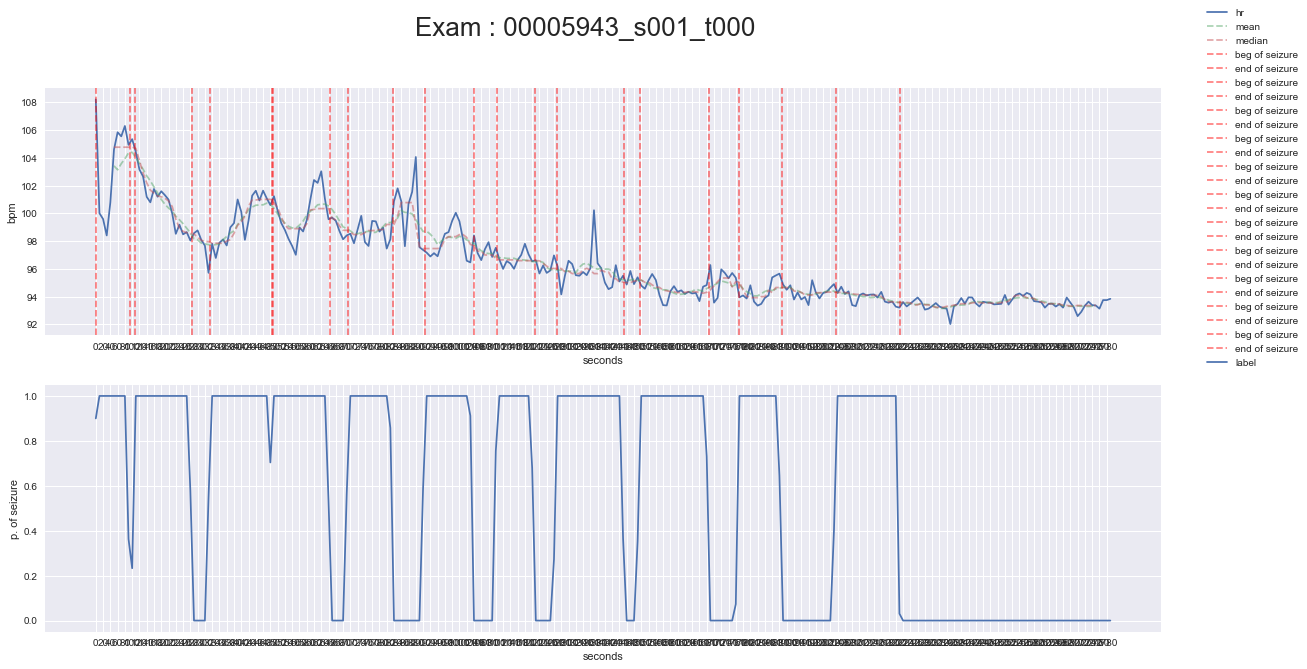

In [54]:
window_obs = 10
print_exam_w_label(df_e)

## Before, during and after seizure analysis

This section is for features creation.
The goal here is to compute the following features for section before the seizure, during seizure and after seizure.

Features :
- Presence of peaks > moving std
- Preaence of peaks < moving std
- slope of rolling mean signal
- global mean - local mean
- global std - local std
- Compute global mean and std for out/in seizure and substract to individual mean and std
- Tachycardy : 
        1. FC > 100 bpm
        2. FC > 120 bpm
        3. delta FC > 10-15 bpm relative to pre critical state
        4. delta FC > 50-60% basale state
        5. delta FC > basale state + 34 bpm
- Brachycardy :


TODO :
1. Create new class, non a_seizure, seizure or b_seizure (basal state) -> from exams with no seizure?
2. Analyse features by patient to check for clusters

In [19]:
# Compute time windows for before, during and after seizure
# \param seizure_data np.array of beginning / end of all seizures of the exam in seconds
# \param before_window time lenght in second of before seizure time window
# \param after_window time lenght in second of after seizure time window
# \param df_index_max pandas dataframe max index
# \return bef_seizures_begs np.array of all before seizure begining dataframe index
# \return seizures_begs np.array of all seizure begining dataframe index
# \return seizures_ends np.array of all seizure ending dataframe index
# \return aft_seizures_ends np.array of all after seizure end dataframe index
def compute_seizure_windows_index(seizure_data, before_window, after_window, df_index_max):
    seizures_begs = []
    seizures_ends = []
    bef_seizures_begs = []
    aft_seizures_ends = []
    for line in seizure_data:
        seizures_begs.append(int(np.round(line[0]/10)))
        seizures_ends.append(int(np.round(line[1]/10)))
        bef_seizures_begs.append(int(np.round(line[0]/10)) - int(before_window/10))
        aft_seizures_ends.append(int(np.round(line[1]/10)) + int(after_window/10))
        
    # Sanities in the limits for before and after seizure index
    for s in range(0, len(seizure_data)):
        if bef_seizures_begs[s] < 0:
            bef_seizures_begs[s] = 0
        if aft_seizures_ends[s] > df_index_max:
            aft_seizures_ends[s] = df_index_max

    # Sanities for other seizures and time windows overlaps
    for s in range(1, len(seizure_data)):
        if bef_seizures_begs[s] < aft_seizures_ends[s-1]:
            middle = int((aft_seizures_ends[s-1] - bef_seizures_begs[s])/2)
            bef_seizures_begs[s] = middle
            aft_seizures_ends[s-1] = middle -1
        if seizures_begs[s] < aft_seizures_ends[s-1]:
            aft_seizures_ends[s-1] = seizures_begs[s] -1
        if bef_seizures_begs[s] < seizures_ends[s-1] :
            bef_seizures_begs[s] = seizures_ends[s-1] + 1
            
#         print('beg_b_s={} | beg_s={} | end_s={} | end_a_s={}'.format(bef_seizures_begs[s], seizures_begs[s], seizures_ends[s], aft_seizures_ends[s]))

    return bef_seizures_begs, seizures_begs, seizures_ends, aft_seizures_ends 

In [20]:
# Compute features for a particular seizure
# \param i_s seizure index
# \param seizure_column column name on which we compute the features (seizure, a_seizure or b_seizure)
# \param exam exam name
# \param df panda dataframe
# \return seizures_feat dictionnary with all features
def compute_features(i_s, seizure_column, exam, patient, df):
    seizures_feat = {}
    if not df[df[seizure_column] == i_s].empty:
        seizures_feat['tag'] = exam
        seizures_feat['patient'] = patient
        seizures_feat['global_mean'] = df['hr'].mean()
        seizures_feat['global_std'] = df['hr'].std()
        seizures_feat['num_of_outliers_inf'] = df.loc[df[seizure_column] == i_s, 'outlier_inf'].sum()
        seizures_feat['num_of_outliers_sup'] = df.loc[df[seizure_column] == i_s, 'outlier_sup'].sum()
        seizures_feat['num_of_outliers_tachy'] = df.loc[df[seizure_column] == i_s, 'outlier_tachy'].sum()
        seizures_feat['num_of_outliers_brachy'] = df.loc[df[seizure_column] == i_s, 'outlier_brachy'].sum()
        seizures_feat['mean'] = df.loc[df[seizure_column] == i_s, 'hr'].mean()
        seizures_feat['std'] = df.loc[df[seizure_column] == i_s, 'hr'].std()
        seizures_feat['mean_diff'] = seizures_feat['global_mean'] - seizures_feat['mean']
        seizures_feat['std_diff'] = seizures_feat['global_std'] - seizures_feat['std']
        
        # Sanity because rolling mean is not computed for all indexes
        if not df.loc[df[seizure_column] == i_s, 'mean'].dropna().empty:
            last_index = df.loc[df[seizure_column] == i_s, 'mean'].dropna().index[-1]
            first_index = df.loc[df[seizure_column] == i_s, 'mean'].dropna().index[0]
            y_d = df.loc[df[seizure_column] == i_s, 'mean'].dropna().iloc[-1] - df.loc[df[seizure_column] == i_s, 'mean'].dropna().iloc[0]
            x_d = (last_index - first_index)
            seizures_feat['slope'] = (y_d/x_d) if x_d != 0.0 else 0.0
        else:
            seizures_feat['slope'] = np.nan
        seizures_feat['length'] = (df[df[seizure_column] == i_s].index[-1] - df[df[seizure_column] == i_s].index[0])*10 # One tick is 10s
        seizures_feat['type'] = seizure_column
        
    return seizures_feat

In [21]:
def compute_all_seizure_features(df_e, before_window=0, after_window=0):
    seizures_feat_array = []
    for exam in df_e.Exam_name:
        patient = df_e.loc[df_e.Exam_name == exam, "Patient_name"].values[0]
        qrs_data = json.load(open(df_e.loc[df_e.Exam_name == exam, "RR_intervals_filepath"].values[0], "r"))
        seizure_data = json.load(open(df_e.loc[df_e.Exam_name == exam, 'Annotations_filepath'].values[0], 'r'))
        hr = qrs_data["swt"]["hr"]

        data = json.load(open(df_e.loc[df_e.Exam_name == exam, "Feats_filepath"].values[0], "r"))
        feats = np.array(data["features"])
        t_feats = np.transpose(feats)
        mean_hr = interpolate_invalid_values(t_feats[14])

        df = pd.DataFrame({'hr': mean_hr, 'label': t_feats[29]})
        w = 10
        
        df['stdP'] = df.hr.rolling(window=w, center=True).mean() + df.hr.rolling(window=w, center=True).std()
        df['stdN'] = df.hr.rolling(window=w, center=True).mean() - df.hr.rolling(window=w, center=True).std()
        df['mean'] = df.hr.rolling(window=w, center=True).mean()
        df['median'] = df.hr.rolling(window=w, center=True).median()
        df.loc[df['hr'] < df['stdN'], 'outlier_inf'] = 1
        df.loc[df['hr'] > df['stdP'], 'outlier_sup'] = 1
        df.loc[df['hr'] > df['mean'] + 34, 'outlier_tachy'] = 1
        df.loc[df['hr'] < 1.5*df['mean'], 'outlier_brachy'] = 1
 
    
        # Compute time windows for before, during and after seizure
        bef_seizures_begs, seizures_begs, seizures_ends, aft_seizures_ends = compute_seizure_windows_index(seizure_data['seizure'], before_window, after_window, df.index.max())

        # Fill dataframe with seizure tags (each seizure has a number)
        df['seizure'] = 0
        df['b_seizure'] = 0
        df['a_seizure'] = 0
        seizure_tag = 1
    
        for s in range(0, len(seizure_data['seizure'])):
            beg_s = seizures_begs[s]
            beg_b_s = bef_seizures_begs[s]
            end_s = seizures_ends[s]
            end_a_s = aft_seizures_ends[s]
            
            if not df.iloc[beg_s:end_s].empty:
                # Tag seizure
                df.iloc[beg_s:end_s, -3] = seizure_tag
                
                # Tag before seizure
                if not df.iloc[beg_b_s:beg_s].empty:
                    df.iloc[beg_b_s:beg_s, -2] = seizure_tag
                
                # Tag after seizure
                if not df.iloc[end_s:end_a_s].empty:
                    df.iloc[end_s:end_a_s, -1] = seizure_tag
                
                seizure_tag += 1

        # Compute features for all time windows
        for i_s in range(1, seizure_tag):
            seizures_feat_array.append(compute_features(i_s, 'seizure', exam, patient, df))
            seizures_feat_array.append(compute_features(i_s, 'b_seizure', exam, patient, df))
            seizures_feat_array.append(compute_features(i_s, 'a_seizure', exam, patient, df))
        
        
    return seizures_feat_array


In [22]:
np.seterr('raise')
features = compute_all_seizure_features(df_filtered, 60, 60)
df_seizures = pd.DataFrame(features)

print('Number of before seizures = {}'.format(df_seizures[df_seizures.type == 'b_seizure'].shape[0]))
print('Number of seizures = {}'.format(df_seizures[df_seizures.type == 'seizure'].shape[0]))
print('Number of after seizures = {}'.format(df_seizures[df_seizures.type == 'a_seizure'].shape[0]))

Number of before seizures = 138
Number of seizures = 165
Number of after seizures = 103


In [24]:
def create_exam_signal_df(df_e, exam, before_window=0, after_window=0):
    patient = df_e.loc[df_e.Exam_name == exam, "Patient_name"].values[0]
    qrs_data = json.load(open(df_e.loc[df_e.Exam_name == exam, "RR_intervals_filepath"].values[0], "r"))
    seizure_data = json.load(open(df_e.loc[df_e.Exam_name == exam, 'Annotations_filepath'].values[0], 'r'))
    hr = qrs_data["swt"]["hr"]

    data = json.load(open(df_e.loc[df_e.Exam_name == exam, "Feats_filepath"].values[0], "r"))
    feats = np.array(data["features"])
    t_feats = np.transpose(feats)
    mean_hr = interpolate_invalid_values(t_feats[14])

    df = pd.DataFrame({'hr': mean_hr, 'label': t_feats[29]})
    
    # Compute time windows for before, during and after seizure
    bef_seizures_begs, seizures_begs, seizures_ends, aft_seizures_ends = compute_seizure_windows_index(seizure_data['seizure'], before_window, after_window, df.index.max())

    # Fill dataframe with seizure tags (each seizure has a number)
    df['seizure'] = 0
    df['b_seizure'] = 0
    df['a_seizure'] = 0
    seizure_tag = 1

    for s in range(0, len(seizure_data['seizure'])):
        beg_s = seizures_begs[s]
        beg_b_s = bef_seizures_begs[s]
        end_s = seizures_ends[s]
        end_a_s = aft_seizures_ends[s]

        if not df.iloc[beg_s:end_s].empty:
            # Tag seizure
            df.iloc[beg_s:end_s, -3] = seizure_tag

            # Tag before seizure
            if not df.iloc[beg_b_s:beg_s].empty:
                df.iloc[beg_b_s:beg_s, -2] = seizure_tag

            # Tag after seizure
            if not df.iloc[end_s:end_a_s].empty:
                df.iloc[end_s:end_a_s, -1] = seizure_tag

            seizure_tag += 1
    return df

In [25]:
toto = create_exam_signal_df(df_e, '00011077_s003_t002', 60, 60)

## Basale signal analysis

"The heart rate of a healthy individual is not a constant even under serene conditions; it keeps on changing throughout the day (between 60 to 80pm for a healthy individual) which can be directly monitored from the ECG. Disease and affliction do influence the heart rate, and therefore, the pattern and the range of heart rate variability would contain important information about the robustness of health, type of disease etc. Therefore, classification based on the spread and pattern of this parameter can provide useful insight about the type and intensity of the affliction."

In [26]:
def compute_all_basale_features(df_e):
    seizures_feat_array = []
    for exam in df_e.Exam_name:
        patient = df_e.loc[df_e.Exam_name == exam, "Patient_name"].values[0]
        try:
            qrs_data = json.load(open(df_e.loc[df_e.Exam_name == exam, "RR_intervals_filepath"].values[0], "r"))
            seizure_data = json.load(open(df_e.loc[df_e.Exam_name == exam, 'Annotations_filepath'].values[0], 'r'))
            hr = qrs_data["swt"]["hr"]

            data = json.load(open(df_e.loc[df_e.Exam_name == exam, "Feats_filepath"].values[0], "r"))

            feats = np.array(data["features"])
            t_feats = np.transpose(feats)
            mean_hr = interpolate_invalid_values(t_feats[14])
        except Exception as e:
            continue
            
        df = pd.DataFrame({'hr': mean_hr, 'label': t_feats[29]})
        w = 10
        
        df['stdP'] = df.hr.rolling(window=w, center=True).mean() + df.hr.rolling(window=w, center=True).std()
        df['stdN'] = df.hr.rolling(window=w, center=True).mean() - df.hr.rolling(window=w, center=True).std()
        df['mean'] = df.hr.rolling(window=w, center=True).mean()
        df['median'] = df.hr.rolling(window=w, center=True).median()
        df.loc[df['hr'] < df['stdN'], 'outlier_inf'] = 1
        df.loc[df['hr'] > df['stdP'], 'outlier_sup'] = 1
        df.loc[df['hr'] > df['mean'] + 34, 'outlier_tachy'] = 1
        df.loc[df['hr'] < 1.5*df['mean'], 'outlier_brachy'] = 1

        # Fill dataframe with seizure tags (each seizure has a number)
        df['basale'] = 0
        
        if len(seizure_data['seizure']) ==0:
            df['basale'] = 1
            seizures_feat_array.append(compute_features(1, 'basale', exam, patient, df))        
        
    return seizures_feat_array

In [27]:
features_no = compute_all_basale_features(df_no_seizure)
df_seizures_no = pd.DataFrame(features_no)

print('Number of basale = {}'.format(df_seizures_no[df_seizures_no.type == 'basale'].shape[0]))

Number of basale = 1364


In [116]:
df_seizures.patient.unique()

array([  3.,  nan,   5.,  11.,  14.,  15.,  24.,  28.,  29.,  32.,  36.,
        38.,  44.,  54.,  56.,  61.,  64.,  65.,  68.,  69.,  70.,  75.,
        84.,  85.,  88.,  91., 104., 105., 108., 110., 118., 129.])

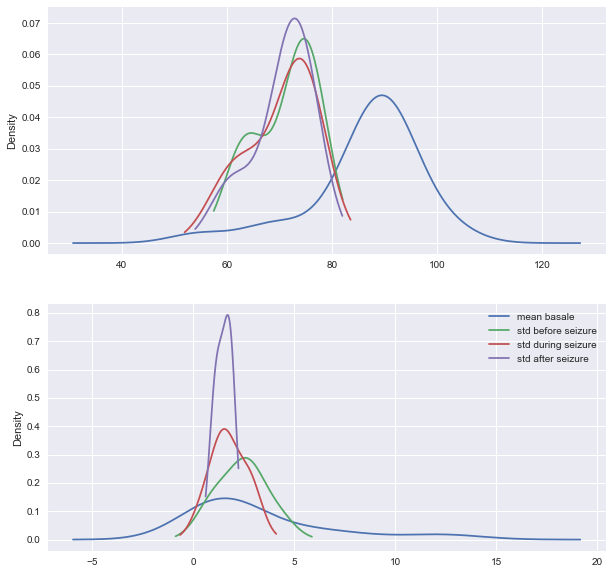

In [32]:
patient_name = 5
fig, ax = plt.subplots(2,1, figsize = (10,10))
df_seizures_no.loc[df_seizures_no.patient == patient_name, 'mean'].plot.kde(label='mean basale', ax=ax[0])
df_seizures.loc[(df_seizures.patient == patient_name) & (df_seizures.type == 'b_seizure'), 'mean'].plot.kde(label='mean before seizure', ax=ax[0])
df_seizures.loc[(df_seizures.patient == patient_name) & (df_seizures.type == 'seizure'), 'mean'].plot.kde(label='mean during seizure', ax=ax[0])
df_seizures.loc[(df_seizures.patient == patient_name) & (df_seizures.type == 'a_seizure'), 'mean'].plot.kde(label='mean after seizure', ax=ax[0])

df_seizures_no.loc[df_seizures_no.patient == patient_name, 'std'].plot.kde(label='mean basale')
df_seizures.loc[(df_seizures.patient == patient_name) & (df_seizures.type == 'b_seizure'), 'std'].plot.kde(label='std before seizure', ax=ax[1])
df_seizures.loc[(df_seizures.patient == patient_name) & (df_seizures.type == 'seizure'), 'std'].plot.kde(label='std during seizure', ax=ax[1])
df_seizures.loc[(df_seizures.patient == patient_name) & (df_seizures.type == 'a_seizure'), 'std'].plot.kde(label='std after seizure', ax=ax[1])

plt.legend()

In [ ]:
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'slope')
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'num_of_outliers_inf')
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'num_of_outliers_sup')
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'num_of_outliers_tachy')
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'num_of_outliers_brachy')
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'mean_diff')
g = sns.FacetGrid(df_seizures, col='type', col_order=['b_seizure', 'seizure', 'a_seizure'])
g.map(sns.distplot, 'std_diff')

# PCA
Visualize features by reducing dimensionality with PCA.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
features = ['mean_diff', 'std_diff', 'num_of_outliers_inf', 'num_of_outliers_sup', 'slope', 'num_of_outliers_tachy', 'num_of_outliers_brachy']

df_seizures = df_seizures.dropna().reset_index()
x = df_seizures.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df_seizures[['type']]], axis = 1)
finalDf.head(5)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(2,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Components PCA', fontsize = 20)


targets = ['seizure', 'b_seizure', 'a_seizure']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# ax2 = fig.add_subplot(2,1,2) 
# ax2.set_xlabel('Principal Component 3', fontsize = 15)
# ax2.set_ylabel('Principal Component 4', fontsize = 15)


# targets = ['seizure', 'b_seizure', 'a_seizure']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['type'] == target
#     ax2.scatter(finalDf.loc[indicesToKeep, 'principal component 3']
#                , finalDf.loc[indicesToKeep, 'principal component 4']
#                , c = color
#                , s = 50)
# ax2.legend(targets)
# ax2.grid()

In [ ]:
print(pca.explained_variance_ratio_)